# Describe The Stars

For this exercise, our population will be the [240 stars selected by NASA](https://www.kaggle.com/datasets/brsdincer/star-type-classification) for their examples of star classification. The aim is to use scatter diagrams to look for anything 'interesting' in the data.

The first thing to do is to look at the data. So run this code block to see a summary of it.

In [337]:
import pandas as pd

stars = pd.read_csv("../../data/smaller-datasets/Stars.csv")
print(stars.info())
print(stars.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   Luminosity      240 non-null    float64
 2   Radius          240 non-null    float64
 3   Abs_magnitude   240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
   Temperature  Luminosity  Radius  Abs_magnitude Color Spectral_Class  Type
0         3068    0.002400  0.1700          16.12   Red              M     0
1         3042    0.000500  0.1542          16.60   Red              M     0
2         2600    0.000300  0.1020          18.70   Red              M     0
3         2800    0.000200  0.1600          16.65   Red              M     0
4         1939    0.000138  0.1030    

So we can see that we have 7 columns. 

```
Temperature, Luminosity, Radius, Abs_magnitude, Color, Spectral_Class, Type
```

You can google some of these terms if you want to learn more about them. Or you can continue with the next part of the investigation.

We are going to pick two of the numerical columns and plot a scatter diagram. (There is a reason why the x-axis is reversed. It has to do with a famous diagram I hope to get to later in the course.)

In [338]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown, SelectionSlider

@interact(
        x = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude"],
            value="Temperature",
            description="x-axis",
            continuous_update=False
        ),
        y = Dropdown(
            options=["Temperature", "Luminosity", "Radius", "Abs_magnitude", "Color"],
            value="Abs_magnitude",
            description="y-axis",
            continuous_update=False
        ),
        use_log = SelectionSlider(
            options = ["given values", "logarithmic"],
            value = "given values",
            description= "mode"
        )
)
def pick_xy(x, y, use_log):
    x_vals = stars[x]
    y_vals = stars[y]

    fig, ax = plt.subplots()
    if use_log == "logarithmic":
        if y == "Color":
            ax.scatter(np.log(x_vals), y_vals)
        else:
            ax.scatter(np.log(x_vals), np.log(y_vals))
        x = "log of " + x
        y = "log of " + y
    else:
        ax.scatter(x_vals, y_vals)
    plt.gca().invert_xaxis()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Scatter graph of "+x+" vs "+ y)
    plt.show()


interactive(children=(Dropdown(description='x-axis', options=('Temperature', 'Luminosity', 'Radius', 'Abs_magn…

There are a few selections which indicate a pattern to the data. Bear in mind: we aren't even using all the data yet. We have ignored 3 of the columns. 

Combinations I found interesting:
- `Abs_magnitude` vs `Temperature`
- `Temperature` vs `Luminosity` (especially in logarithmic mode)

## Exercise

Can you add `Color` to the y-axis so we can see if there is a relationship between colour and temperature?

<details>
<summary>Reveal suggested answer</summary>

Add the string "Color" to the list of options for the vaiable `y`:

```python
options=["Temperature", "Luminosity", "Radius", "Abs_magnitude", "Color"],
```
</details>

The blue stars seem to have a wide range of temperatures. It's hard to see how many reds we have, because they are bunched together. Try turning on logarithmic mode. It stretches out the reds and squashes the blues. 

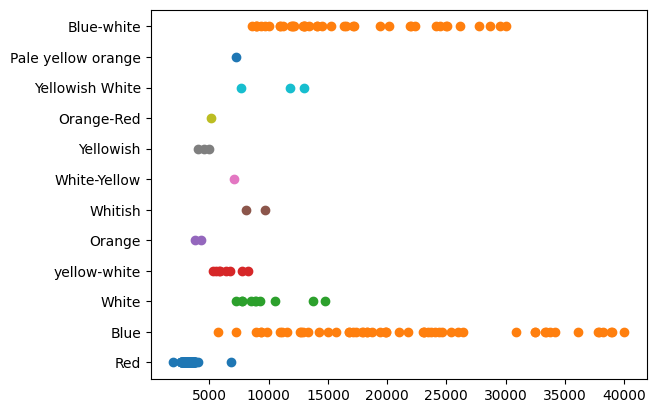

In [339]:
for color in list(set(list(stars['Color']))):
    data = stars.loc[stars['Color'] == color]
    temps = data['Temperature']
    plt.scatter(temps, len(temps) * [color])

In [340]:
# mean_data = {}

# for color in list(set(list(stars['Color']))):
#     data = stars.loc[stars['Color'] == color]
#     temps = list(data['Temperature'])
#     mean_data[color] = round(sum(temps) / len(temps), 1)

# mean_data_df = pd.DataFrame(mean_data.items(), columns=['Color', 'Mean Temperature'])
# mean_data_df.sort_values('Mean Temperature', ascending=False)

stars.groupby("Color")["Temperature"].mean().reset_index(name="mean temperature").sort_values(by="mean temperature", ascending=False).round(1)


,Color,mean temperature
0,Blue,21918.3
1,Blue-white,16660.0
10,Yellowish White,10826.7
6,White,9720.3
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6466.2
3,Orange-Red,5112.0
9,Yellowish,4527.7


In [341]:
stars.groupby("Color")["Temperature"].median().reset_index(name="median temperature").sort_values(by="median temperature", ascending=False).round(1)

,Color,median temperature
0,Blue,19921.5
1,Blue-white,14100.0
10,Yellowish White,11790.0
6,White,8879.5
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6158.0
3,Orange-Red,5112.0
9,Yellowish,4526.0


<Axes: >

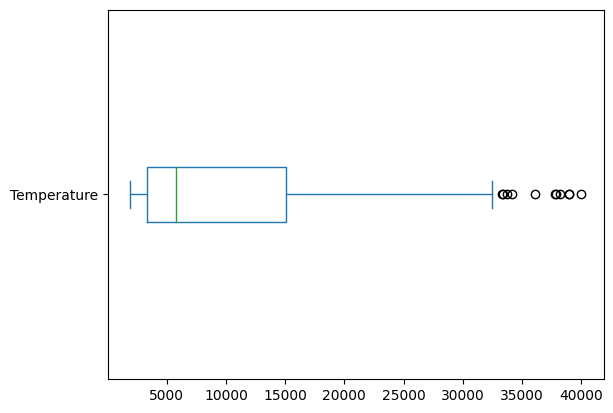

In [342]:
stars.Temperature.plot.box(vert = False)

In [343]:
above_upp_quart = stars.Temperature.quantile(3/4) + 1.5 * (stars.Temperature.quantile(3/4) - stars.Temperature.quantile(1/4)) 
above_upp_quart

32622.375

There were no outliers to the left of our box-plot of star temperatures, so there were no "cold" stars that were found to be outliers. But there are still a group of stars we can regard as the coldest 2% of stars in our dataset. Find them.

In [344]:
low_limit = stars.Temperature.quantile(2/100)
cold_stars = stars[stars['Temperature'] <= low_limit]
cold_stars

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
2,2600,0.000300,0.102,18.70,Red,M,0
4,1939,0.000138,0.103,20.06,Red,M,0
6,2637,0.000730,0.127,17.22,Red,M,0
7,2600,0.000400,0.096,17.40,Red,M,0
78,2621,0.000600,0.098,12.81,Red,M,1


It may be worth noting that all of the coldest 2% of stars are red and of spectral class M. However, it is worth noting that red stars are by a large margin the most frequent, with twice as many red stars as the second most populous stars. 

Red stars had the lowest mean and median temperature calculated earlier though so this conclusion about the coldest stars being red stars is backed up by that information.  

EXERCISE 4  

Draw a pie chart of the colours of stars. Display the top five colours and group the rest into "other".

In this exercise, the colour of the stars and the Color category are a prime example of the Nominal Statistical Data Type.

array([<Axes: ylabel='Frequency'>], dtype=object)

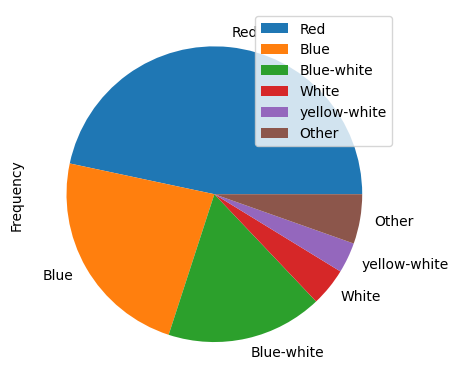

In [345]:
colors_list = list(stars['Color'])
unique_colors = list(set(colors_list))
col_frequency = [colors_list.count(value) for value in unique_colors]

frequency_df = pd.DataFrame({'Color' : unique_colors, 'Frequency' : col_frequency}).sort_values('Frequency', ascending=False)
other_sum = sum(frequency_df.Frequency[5:])
frequency_df = frequency_df[:5]
frequency_df.loc[len(frequency_df.index)] = ['Other', other_sum]
frequency_df = frequency_df.set_index('Color')
frequency_df.plot.pie(y='Frequency',subplots=True)


Alternative method:

Color
Red             112
Blue             56
Blue-white       41
White            10
yellow-white      8
Name: count, dtype: int64
Color
Red             112
Blue             56
Blue-white       41
other            13
White            10
yellow-white      8
Name: count, dtype: int64


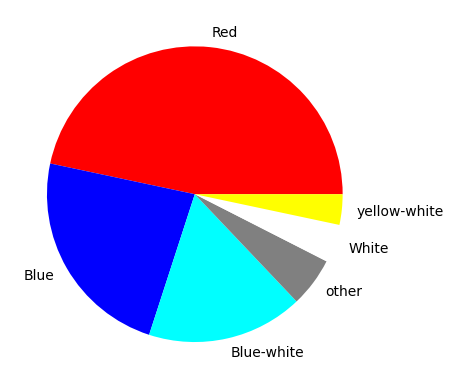

In [346]:
star_colours = stars['Color']

top_five = stars['Color'].value_counts().nlargest(5)

print(top_five)

colours = star_colours.apply(lambda x: x if x in top_five else 'other')

print(colours.value_counts())

stars['Color'].sort_values()
category_colors = ['red', 'blue', 'cyan', 'gray', 'white', 'yellow']

plt.pie(colours.value_counts(), labels=colours.value_counts().index, colors=category_colors )
plt.show()

As you may remember: we made this diagram by plotting each of our 240 stars according to the log of its temperature and luminosity. The result doesn't look random. It reveals various groupings of stars:

One along the top where luminosity doesn't appear to be related to temperature. There's almost a flat line. (Giants)
Another group near the bottom, where there is perhaps a gentle slope, where cooler stars are slightly less bright. (White dwarves)
A line of stars from top left to bottom right, where cooler stars are definitely less bright. (Main sequence)
A clump of stars at the end of the above line. (Brown dwarves)
The colour coding in our version of the diagram doesn't show this. Our colour coding is based on spectral class rather than the types named above. Can you create another column to marks stars in the four given groups? Then make a version of the diagram with better colour coding.

Think about how you would identify stars in those groups from the data that is already there. Use pandas. Don't go through the csv file one row at a time!

First I plotted the data so that I can see what it looks like. 

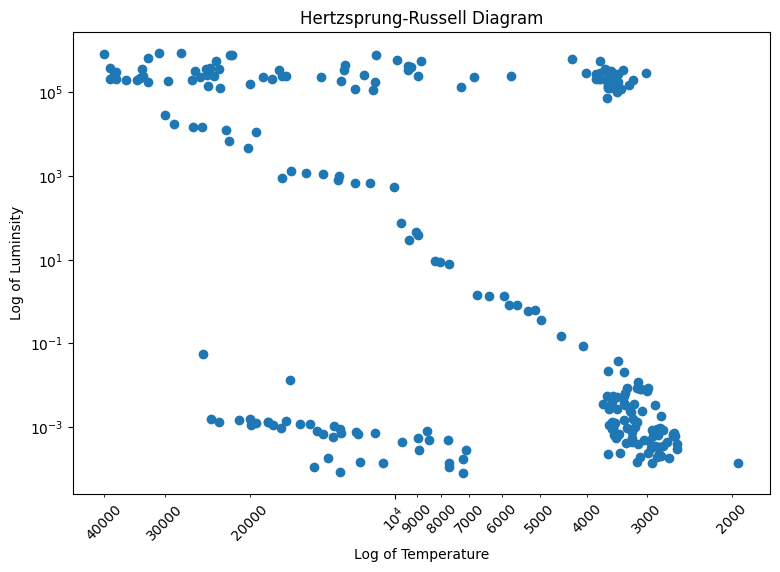

In [347]:
from matplotlib.ticker import FormatStrFormatter

stars = pd.read_csv("../../data/smaller-datasets/Stars.csv")

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter((stars.Temperature), stars.Luminosity)
plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("Log of Temperature")
plt.ylabel("Log of Luminsity")
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
ax.tick_params(axis="x", which="both", rotation=45)


I then created regions based on Temperature and Luminosity in which the different types of star are grouped. Using these regions I made new dataframes for each type of star and plotted these.

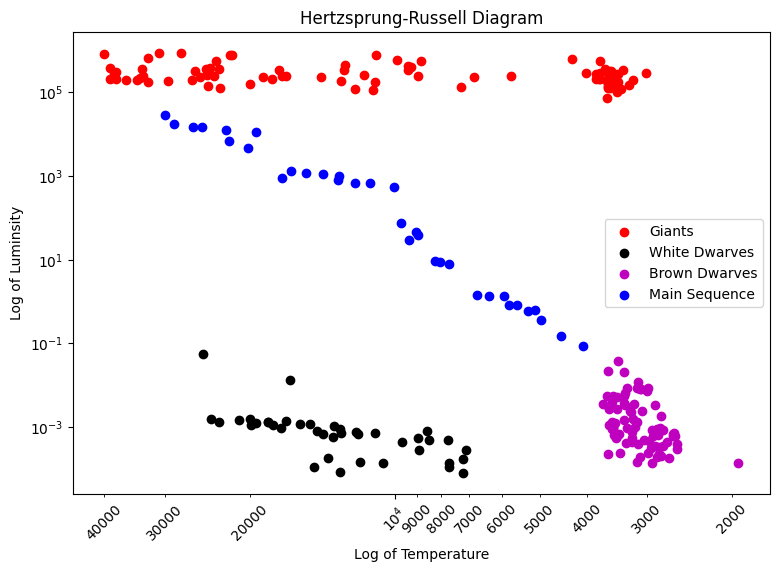

In [348]:
giants = stars.loc[stars.Luminosity > 3 * 10**4]
white_dwarves = stars.loc[(stars.Luminosity < 0.08) & (stars.Temperature > 4000)]
brown_dwarves = stars.loc[(stars.Luminosity < 0.1) & (stars.Temperature < 4000)]
main_sequence = pd.concat([stars, white_dwarves, white_dwarves, brown_dwarves, brown_dwarves, giants, giants]).drop_duplicates(keep=False)

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter((giants.Temperature), giants.Luminosity, color='r', label='Giants')
ax.scatter((white_dwarves.Temperature), white_dwarves.Luminosity, color='k', label='White Dwarves')
ax.scatter((brown_dwarves.Temperature), brown_dwarves.Luminosity, color='m', label='Brown Dwarves')
ax.scatter((main_sequence.Temperature), main_sequence.Luminosity, color='b', label='Main Sequence')
plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("Log of Temperature")
plt.ylabel("Log of Luminsity")
plt.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
ax.tick_params(axis="x", which="both", rotation=45)

I noticed I was supposed to add a 'type' column to the original dataframe so I used this method below:

86

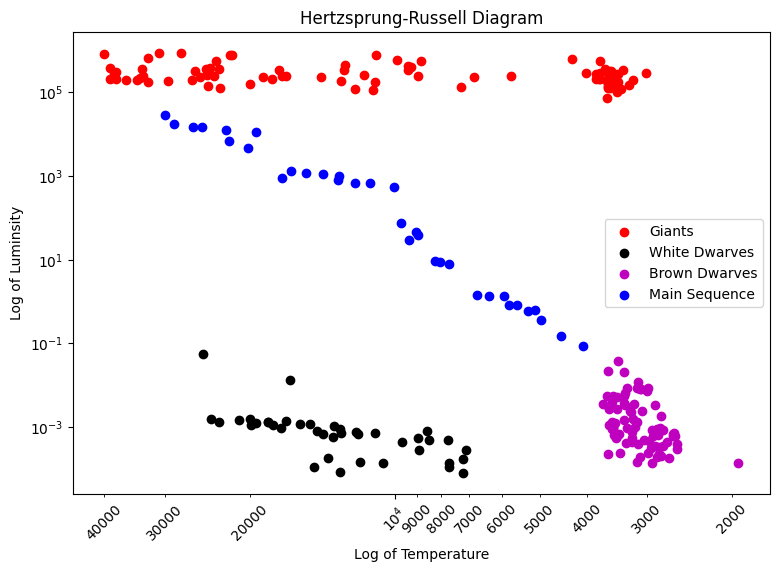

In [349]:
def type_decider(row):
    if (row['Temperature'] < 4000) & (row['Luminosity']  < 0.1):
        return 'brown dwarf'
    if (row['Temperature'] > 4000) & (row['Luminosity']  < 0.08):
        return 'white dwarf'
    if row['Luminosity'] > 3 * 10**4:
        return 'giant'
    else:
        return 'main sequence'

stars['Type'] = stars.apply(lambda row: type_decider(row), axis=1)

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(stars.loc[stars['Type']== 'giant']['Temperature'] , stars.loc[stars['Type']== 'giant']['Luminosity'], color='r', label='Giants')
ax.scatter(stars.loc[stars['Type']== 'white dwarf']['Temperature'] , stars.loc[stars['Type']== 'white dwarf']['Luminosity'], color='k', label='White Dwarves')
ax.scatter(stars.loc[stars['Type']== 'brown dwarf']['Temperature'] , stars.loc[stars['Type']== 'brown dwarf']['Luminosity'], color='m', label='Brown Dwarves')
ax.scatter(stars.loc[stars['Type']== 'main sequence']['Temperature'] , stars.loc[stars['Type']== 'main sequence']['Luminosity'], color='b', label='Main Sequence')

plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("Log of Temperature")
plt.ylabel("Log of Luminsity")
plt.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
ax.tick_params(axis="x", which="both", rotation=45)

len(stars.loc[stars['Type']== 'giant'])

The areas where clusters meet are inaccurate with this technique. For example it would be hard to tell using just temperature and luminosity whether a star in the top left-hand corner should be in the main sequence or giants category. In the graph coloured by spectral class it does look like some stars in the main sequence could be mixed in with the giants.

 This method used visual grouping and not any statistical test of which datapoints are clustered. Using other information in the csv data to group would give more accurate groupings. 

 I looked online for qualities of the different types of stars that I could group by:

 Giant - A giant star is a star with substantially larger radius and luminosity than a main-sequence star of the same surface temperature. 

 White dwarf - Most noteworthy is a white dwarf's high density, unfortunately we are not given mass so I can't use this piece of information. 

 Brown dwarfs - Brown dwarfs are the end point of white dwarfs as they cool, I would therefore expect it is difficult to choose a sensible point to seperate the two sets. However with this dataset there is a clear divide. They are expected to have smaller radii than most main sequence stars. 

 However, I have now noticed there is already a type in the original csv file, these look like they might correspond to the star types but there appear to be 6 types. I'm going to plot by these types and see how they appear on the graph.





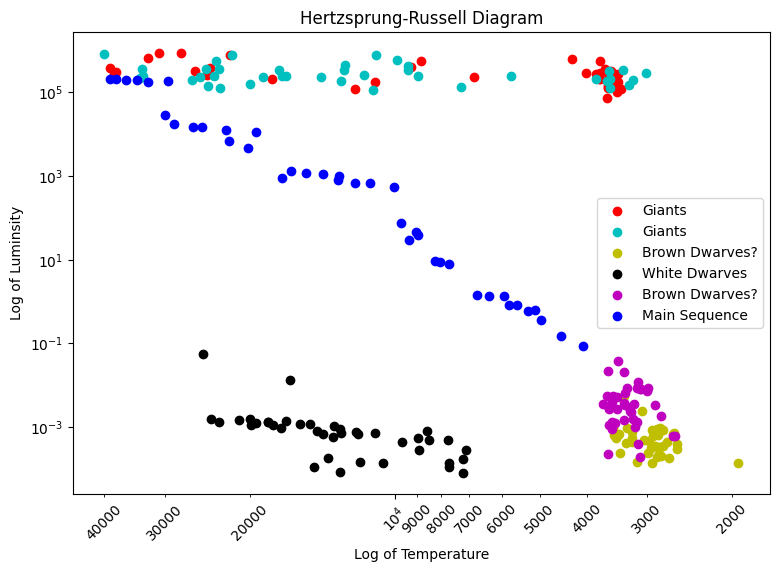

In [350]:
stars = pd.read_csv("../../data/smaller-datasets/Stars.csv")

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(stars.loc[stars['Type']== 5]['Temperature'] , stars.loc[stars['Type']== 5]['Luminosity'], color='r', label='Giants')
ax.scatter(stars.loc[stars['Type']== 4]['Temperature'] , stars.loc[stars['Type']== 4]['Luminosity'], color='c', label='Giants')
ax.scatter(stars.loc[stars['Type']== 0]['Temperature'] , stars.loc[stars['Type']== 0]['Luminosity'], color='y', label='Brown Dwarves?')
ax.scatter(stars.loc[stars['Type']== 2]['Temperature'] , stars.loc[stars['Type']== 2]['Luminosity'], color='k', label='White Dwarves')
ax.scatter(stars.loc[stars['Type']== 1]['Temperature'] , stars.loc[stars['Type']== 1]['Luminosity'], color='m', label='Brown Dwarves?')
ax.scatter(stars.loc[stars['Type']== 3]['Temperature'] , stars.loc[stars['Type']== 3]['Luminosity'], color='b', label='Main Sequence')


plt.title("Hertzsprung-Russell Diagram")
plt.xlabel("Log of Temperature")
plt.ylabel("Log of Luminsity")
plt.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.invert_xaxis()
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
ax.tick_params(axis="x", which="both", rotation=45)

These types do appear to correspond to the star types given, but with overlap. There are two types in the bottom right corner where brown dwarves are expected and two making up the giants.

To do the best grouping by star type I would look into the source of the original data and find out more about this type column. 


In [351]:
print(f'There are {len(stars.loc[stars["Type"]== 5])} stars of type 5.')
print(f'There are {len(stars.loc[stars["Type"]== 4])} stars of type 4.')
print(f'There are {len(stars.loc[stars["Type"]== 3])} stars of type 3.')
print(f'There are {len(stars.loc[stars["Type"]== 2])} stars of type 2.')
print(f'There are {len(stars.loc[stars["Type"]== 1])} stars of type 1.')
print(f'There are {len(stars.loc[stars["Type"]== 0])} stars of type 0.')

There are 40 stars of type 5.
There are 40 stars of type 4.
There are 40 stars of type 3.
There are 40 stars of type 2.
There are 40 stars of type 1.
There are 40 stars of type 0.


There are 40 of each type, presumably this was 'Type' field was used when choosing data to go in this sample.